<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana15/HiddenMarkovModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [7]:
# Definimos estados y priors
States = np.array([0,1])
Prior = np.array([0.4,0.6])

In [8]:


# Definimos matrices de emisión y transmision
T = np.array([[0.7,0.5],[0.3,0.5]])

E = np.array([[0.8,0.2],[0.1,0.3],[0.1,0.5]])

#np.sum(T,axis=0)

In [9]:
# Secuencia Observad
Obs = np.array([1,2,0])

In [12]:
DictH = {0:'Feliz',1:'Triste'}
DictH[0]

'Feliz'

In [13]:
DictO = {0:'Rojo',1:'Verde',2:'Azul'}
DictO[0]

'Rojo'

In [51]:
def GetStates(State,N):

  CStates = list(combinations_with_replacement(State,N))
  #print(CStates)
  #print(len(CStates))
  Permu = []

  for it in CStates:
    p = list(permutations(it,N))

    for i in p:
      if i not in Permu:
        Permu.append(i)
  return np.array(Permu)

In [52]:
HiddenStates = GetStates(States,3)
HiddenStates

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [53]:
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.

  # Probabilidad a priori

  p = Prior[ State[0] ]
  #print(p)
  for i in range(n-1):
    p *= T[ State[i+1],State[i] ]
  #  print(p)

  for i in range(n):
    p *= E[ Obs[i],State[i] ]
   # print(p)

  return p

In [54]:
GetProb(T,E,Obs,[0,0,1],Prior)

np.float64(0.00016800000000000002)

In [55]:
P = np.zeros(HiddenStates.shape[0])
P
for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

<StemContainer object of 3 artists>

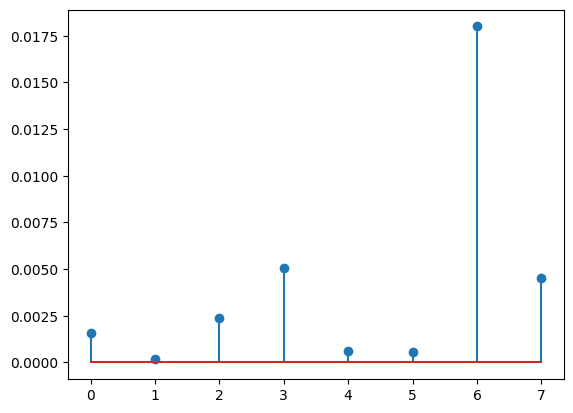

In [56]:
plt.stem(P)

In [57]:
# Probabilidad de que la persona se haya vestido de esa forma
np.sum(P)

np.float64(0.032816)

In [58]:
ObsStates = GetStates([0,1,2],3)
ObsStates

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 2],
       [0, 2, 0],
       [2, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 0],
       [0, 1, 2],
       [0, 2, 1],
       [1, 0, 2],
       [1, 2, 0],
       [2, 0, 1],
       [2, 1, 0],
       [0, 2, 2],
       [2, 0, 2],
       [2, 2, 0],
       [1, 1, 1],
       [1, 1, 2],
       [1, 2, 1],
       [2, 1, 1],
       [1, 2, 2],
       [2, 1, 2],
       [2, 2, 1],
       [2, 2, 2]])